In [10]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from first_approach import preprocess_data
from sklearn.model_selection import train_test_split

# Data Loading

In [11]:
data=pd.read_csv('data/data.csv')
train, test = train_test_split(
   data, test_size=0.3, random_state=42
)

# Data Preparation

In [12]:
train=preprocess_data(train)

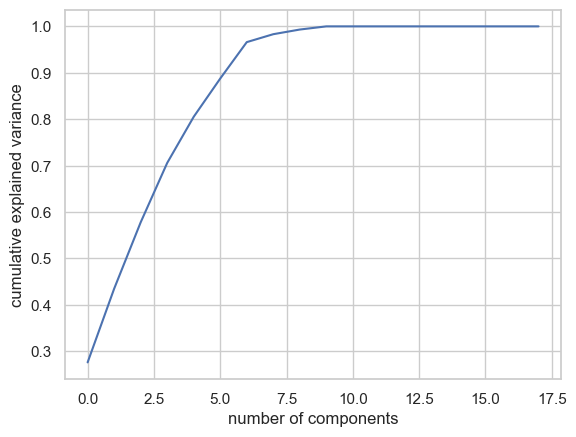

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.276144,0.276144
1,0.434816,0.158672
2,0.577841,0.143025
3,0.705798,0.127957
4,0.805254,0.099456
5,0.887646,0.082392
6,0.966066,0.078420
7,0.983151,0.017085
8,0.993175,0.010025
9,1.000000,0.006825


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=18)
pca_test.fit(train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [54]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)

# pca.fit(data_scaled)


# transformed_data = pca.transform(data_scaled)
# data_scaled = transformed_data

In [15]:
pca2 = PCA(n_components=2)
pca2.fit(train)
transformed_data2 = pca2.transform(train)
train2=transformed_data2

pca3 = PCA(n_components=3)
pca3.fit(train)
transformed_data3 = pca3.transform(train)
train3=transformed_data3

pca4 = PCA(n_components=4)
pca4.fit(train)
transformed_data4 = pca4.transform(train)
train4=transformed_data4

pca5 = PCA(n_components=5)
pca5.fit(train)
transformed_data5 = pca5.transform(train)
train5=transformed_data5

# K-Means Clustering

In [18]:
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [28]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def metrics_plots(X, max_k=10):
    warnings.simplefilter(action='ignore', category=FutureWarning)
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    for ax, metric in zip(axes, ['Within-cluster sum of squares', 'Silhouette Score', 'Calinski Harabasz', 'Davies Bouldin']):
        score = []
        for k in range(2, max_k):
            kmeans = KMeans(n_clusters=k, random_state=101)
            predictions = kmeans.fit_predict(X)
            if metric == 'Within-cluster sum of squares':
                score.append(-kmeans.score(X))
            elif metric == 'Silhouette Score':
                score.append(silhouette_score(X, kmeans.labels_, metric='euclidean'))
            elif metric == 'Calinski Harabasz':
                score.append(calinski_harabasz_score(X, kmeans.labels_))
            elif metric == 'Davies Bouldin':
                score.append(davies_bouldin_score(X, predictions))

        x_ticks = list(range(2, len(score) + 2))
        ax.plot(x_ticks, score, 'bx-')
        ax.set_xlabel('k')
        ax.set_ylabel(metric)
        ax.set_title('Optimal k')

    plt.show()


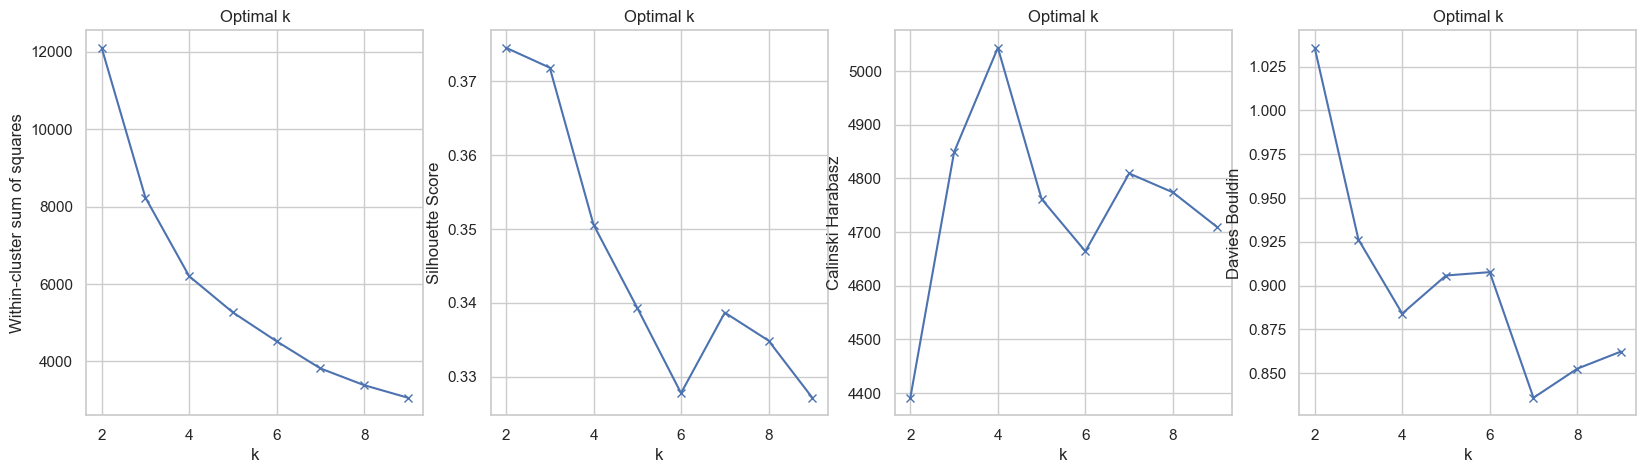

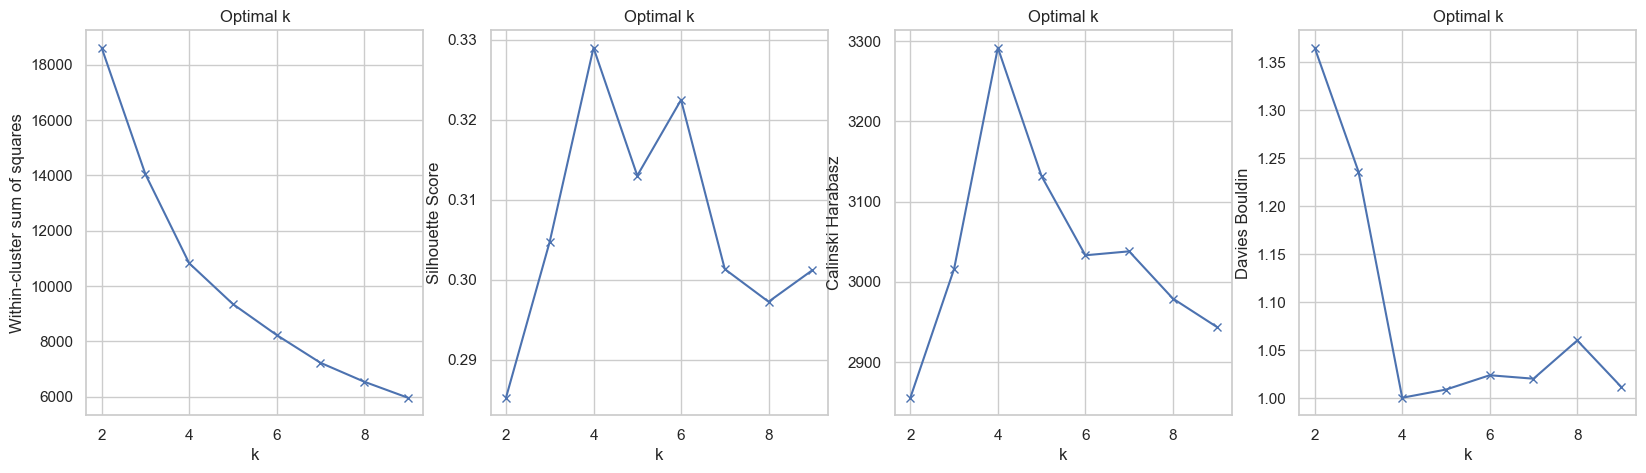

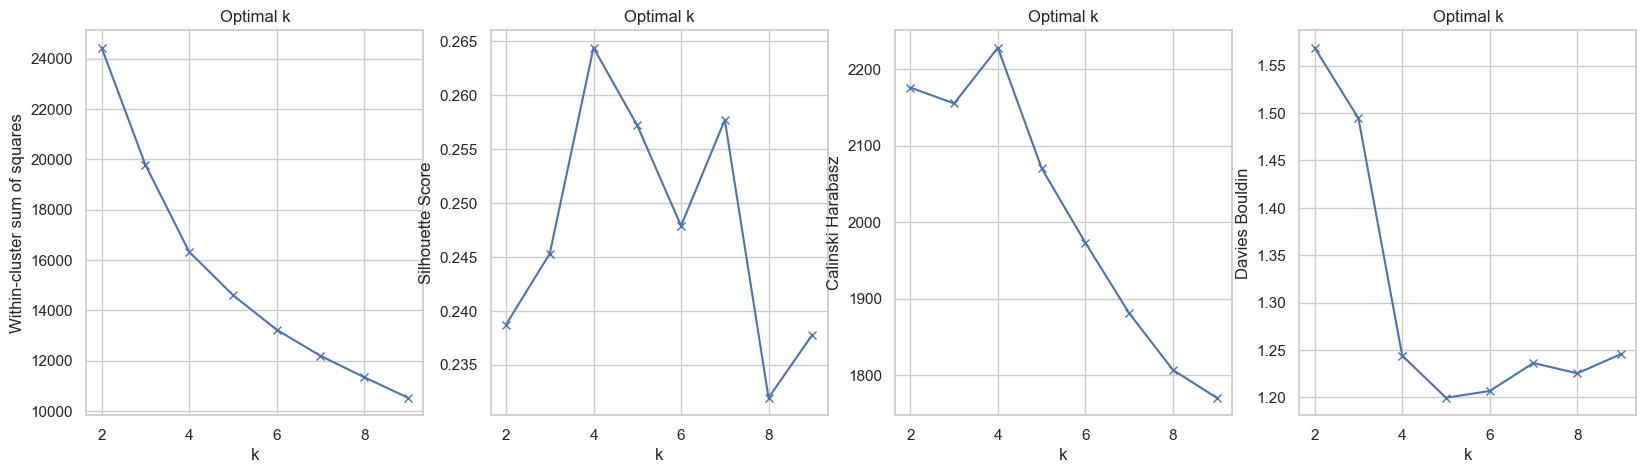

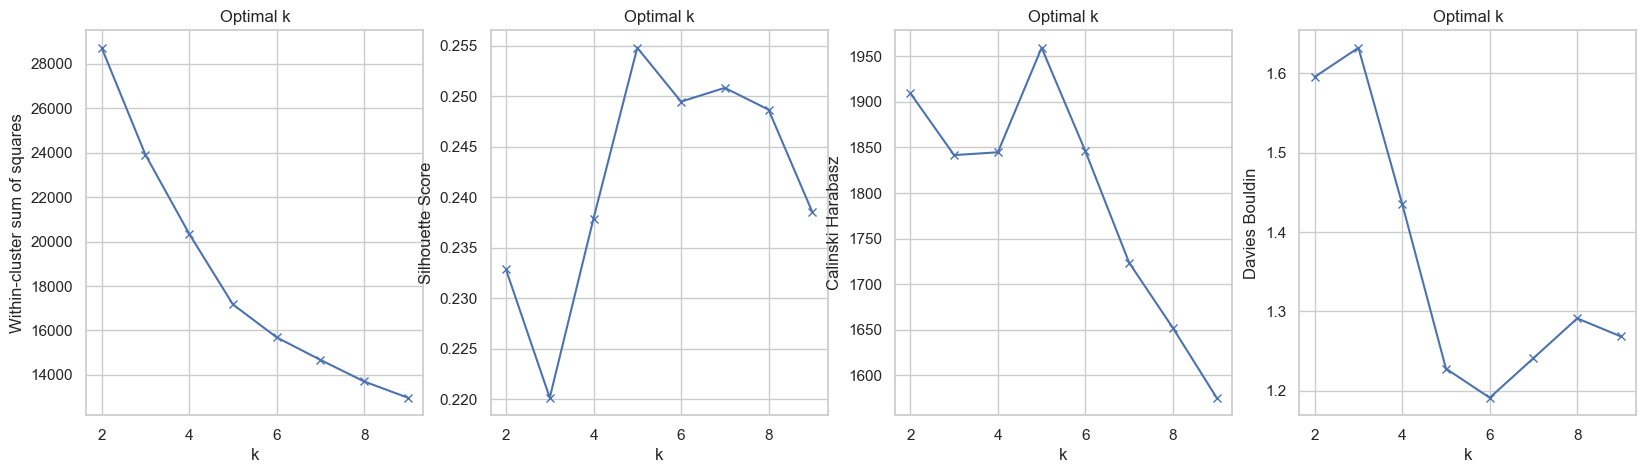

In [30]:
metrics_plots(train2,max_k=10)
metrics_plots(train3,max_k=10)
metrics_plots(train4,max_k=10)
metrics_plots(train5,max_k=10)

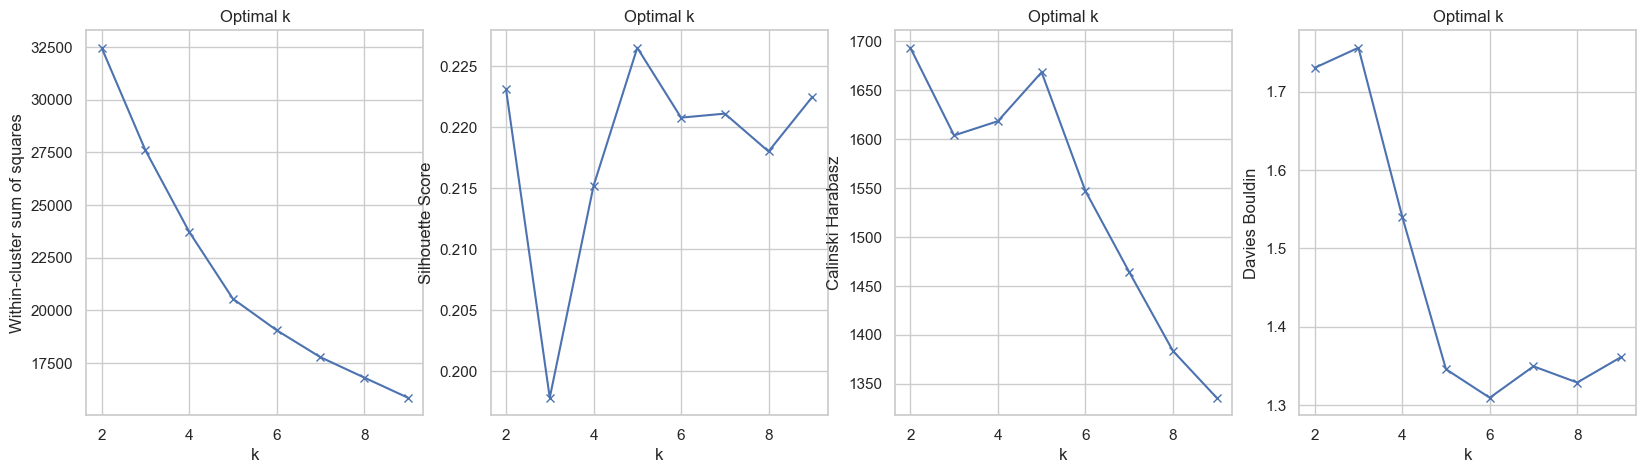

In [32]:
pca6 = PCA(n_components=6)
pca6.fit(train)
transformed_data6 = pca6.transform(train)
train6=transformed_data6
metrics_plots(train6,max_k=10)

In [51]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(train2)
train2 = pd.DataFrame(transformed_data2, columns=['PCA1', 'PCA2'])
train2['Cluster_KMeans'] = clusters_kmeans

In [52]:
silhouette_avg = silhouette_score(train2, clusters_kmeans)
davies_bouldin_avg = davies_bouldin_score(train2, clusters_kmeans)
print(f"KMeans Silhouette Score: {silhouette_avg}")
print(f"KMeans Davies-Bouldin Score: {davies_bouldin_avg}")

KMeans Silhouette Score: 0.45925508328147946
KMeans Davies-Bouldin Score: 0.8220870501852295


# Hierarchical Clustering

In [53]:
hierarchical = AgglomerativeClustering(n_clusters=3)
clusters_hierarchical = hierarchical.fit_predict(train2)
train2['Cluster_Hierarchical'] = clusters_hierarchical

# DBSCAN Clustering

First of all let's find the correct hyperparameters

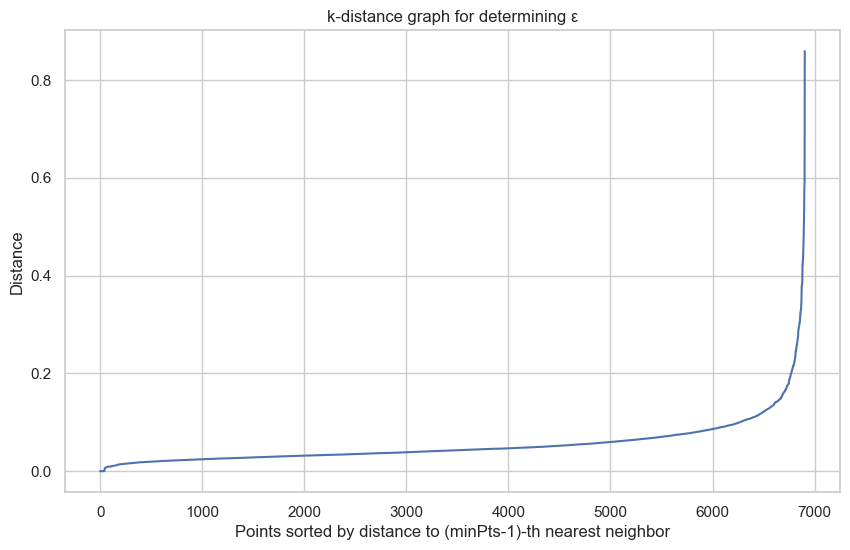

In [45]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


n_dimensions = train2.shape[1]
minPts = 2 * n_dimensions


nbrs = NearestNeighbors(n_neighbors=minPts).fit(train2)
distances, indices = nbrs.kneighbors(train2)


k_distance = distances[:, minPts-1]


k_distance_sorted = np.sort(k_distance)


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(k_distance_sorted) + 1), k_distance_sorted)
plt.xlabel('Points sorted by distance to (minPts-1)-th nearest neighbor')
plt.ylabel('Distance')
plt.title('k-distance graph for determining ε')
plt.grid(True)
plt.show()

In [54]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(train2)
train2['Cluster_DBSCAN'] = clusters_dbscan

# Gaussian Mixture Models (GMM) Clustering

In [55]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(train2)
train2['GMM_Clustering'] = gmm_labels

# Evaluation

In [49]:
def evaluate_clustering(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)
    return silhouette_avg, davies_bouldin, calinski_harabasz

In [56]:
kmeans_scores = evaluate_clustering(train2, clusters_kmeans)
hierarchical_scores = evaluate_clustering(train2, clusters_hierarchical)
dbscan_scores = evaluate_clustering(train2[clusters_dbscan != -1], clusters_dbscan[clusters_dbscan != -1])
gmm_scores = evaluate_clustering(train2, gmm_labels)

evaluation_results = pd.DataFrame({
    'Clustering Algorithm': ['K-Means', 'Hierarchical', 'DBSCAN', 'GMM'],
    'Silhouette Score': [kmeans_scores[0], hierarchical_scores[0], dbscan_scores[0], gmm_scores[0]],
    'Davies-Bouldin Index': [kmeans_scores[1], hierarchical_scores[1], dbscan_scores[1], gmm_scores[1]],
    'Calinski-Harabasz Score': [kmeans_scores[2], hierarchical_scores[2], dbscan_scores[2], gmm_scores[2]]
})

evaluation_results

,Clustering Algorithm,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Score
0,K-Means,0.542875,0.703498,8159.876659
1,Hierarchical,0.542875,0.703498,8159.876659
2,DBSCAN,0.540104,0.583866,4359.084551
3,GMM,0.496604,0.660839,4258.916981


# Cluster Visualization

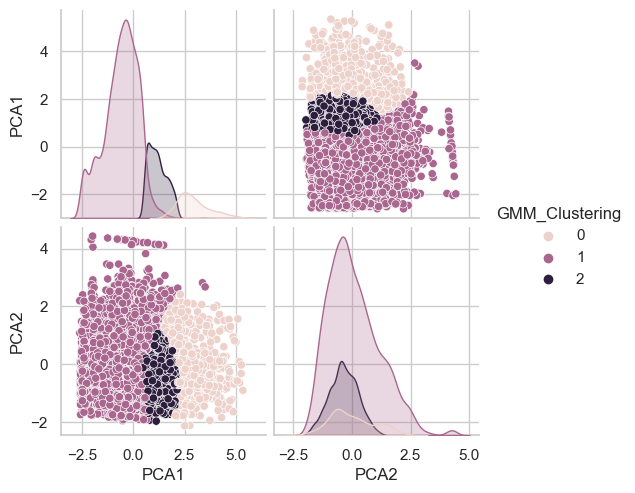

In [58]:
numerical_cols = train2.columns[:2]
sns.pairplot(train2, hue='GMM_Clustering', vars=numerical_cols)
plt.show()